# RANDOM FOREST REGRESSOR

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/50_Startups.csv")
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [4]:
df.dtypes


,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [5]:
print("\nDuplicate Rows:", df.duplicated().sum())



Duplicate Rows: 0


In [6]:
df.nunique()


,0
R&D Spend,49
Administration,50
Marketing Spend,48
State,3
Profit,50


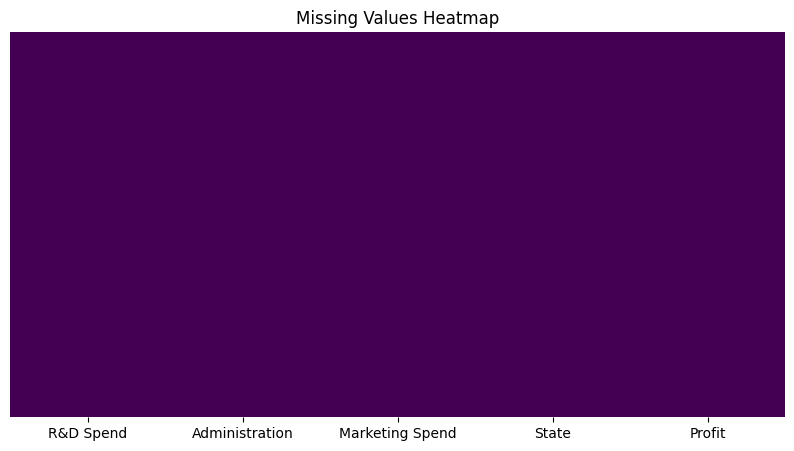

In [7]:


# 1. Missing values heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df["State"]


,State
0,New York
1,California
2,Florida
3,New York
4,Florida
5,New York
6,California
7,Florida
8,New York
9,California


In [11]:
len(df)

50

In [12]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['State_encoded'] = le.fit_transform(df['State'])

print(df[['State', 'State_encoded']].head())


        State  State_encoded
0    New York              2
1  California              0
2     Florida              1
3    New York              2
4     Florida              1


In [13]:
df.drop(columns=['State'], inplace=True)


Mean Squared Error: 54469386.6860383
R² Score: 0.9327365771346809


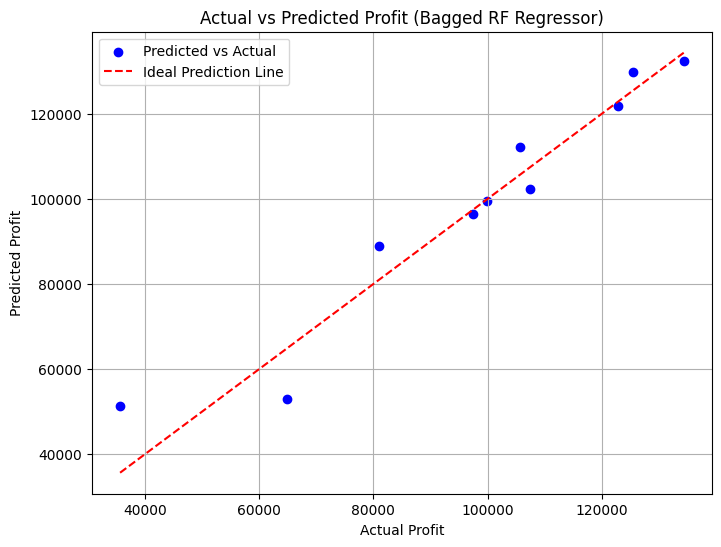

In [14]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features and target
X = df.drop(columns=['Profit'])
y = df['Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Wrap with Bagging Regressor
bagging_reg = BaggingRegressor(estimator=rf_reg, n_estimators=10, random_state=42)

# Fit the model
bagging_reg.fit(X_train_scaled, y_train)

# Predict
y_pred = bagging_reg.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Ideal Prediction Line')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit (Bagged RF Regressor)')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 101278019.95326242
R² Score: 0.8749333029515337


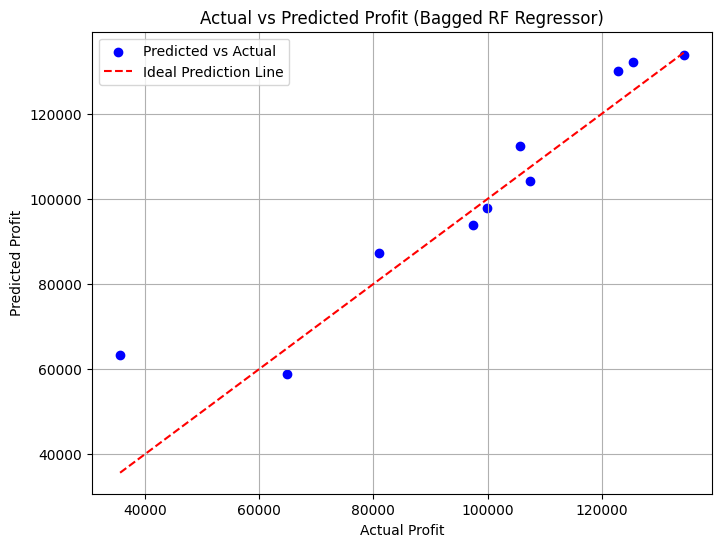

In [15]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features and target
X = df.drop(columns=['Profit'])
y = df['Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=10, random_state=42)

# Wrap with Bagging Regressor
bagging_reg = BaggingRegressor(estimator=rf_reg, n_estimators=1, random_state=42)

# Fit the model
bagging_reg.fit(X_train_scaled, y_train)

# Predict
y_pred = bagging_reg.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Ideal Prediction Line')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit (Bagged RF Regressor)')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 127617145.37477991
R² Score: 0.8424075148176953


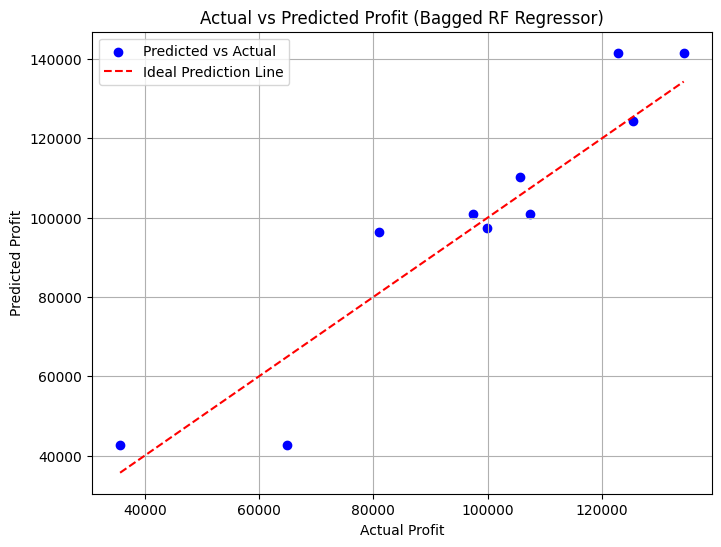

In [16]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features and target
X = df.drop(columns=['Profit'])
y = df['Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=1, random_state=42)

# Wrap with Bagging Regressor
bagging_reg = BaggingRegressor(estimator=rf_reg, n_estimators=1, random_state=42)

# Fit the model
bagging_reg.fit(X_train_scaled, y_train)

# Predict
y_pred = bagging_reg.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Ideal Prediction Line')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit (Bagged RF Regressor)')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 58867761.19841166
R² Score: 0.9273050908862477


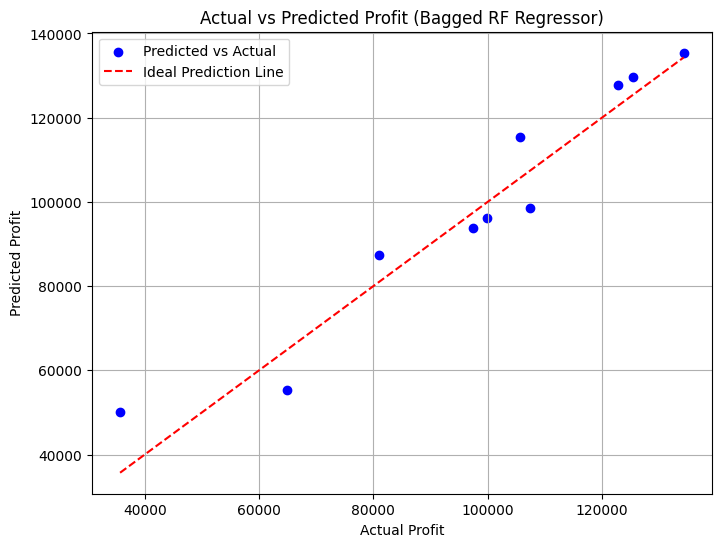

In [17]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features and target
X = df.drop(columns=['Profit'])
y = df['Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=9, random_state=42)

# Wrap with Bagging Regressor
bagging_reg = BaggingRegressor(estimator=rf_reg, n_estimators=5, random_state=42)

# Fit the model
bagging_reg.fit(X_train_scaled, y_train)

# Predict
y_pred = bagging_reg.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Ideal Prediction Line')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit (Bagged RF Regressor)')
plt.legend()
plt.grid(True)
plt.show()
